In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

plt.style.use('bmh')

In [2]:
data = pd.read_excel('default of credit card clients.xls', index_col=0, header=1)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
X = data.copy(deep=True)
y = X.pop('default payment next month')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y)

In [4]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

## Mean Decrease in Impurity

In [5]:
importances = forest.feature_importances_
trees_importances = np.array([tree.feature_importances_ for tree in forest.estimators_])
importances_std = trees_importances.std(axis=0)
importances_df = pd.DataFrame(data={'importances':importances, 'std':importances_std}, index=X_train.columns)
importances_df.sort_values(by='importances', ascending=False, inplace=True)

In [6]:
for feature, imp, std in zip(importances_df.index, importances_df['importances'].values, importances_df['std'].values):
        print(f"{feature:10s} ----> {imp:.4f} +/- {std:.4f}")

PAY_0      ----> 0.0946 +/- 0.0399
AGE        ----> 0.0659 +/- 0.0048
BILL_AMT1  ----> 0.0599 +/- 0.0051
LIMIT_BAL  ----> 0.0584 +/- 0.0052
BILL_AMT2  ----> 0.0555 +/- 0.0054
BILL_AMT3  ----> 0.0524 +/- 0.0049
PAY_AMT1   ----> 0.0514 +/- 0.0080
BILL_AMT4  ----> 0.0507 +/- 0.0049
BILL_AMT5  ----> 0.0497 +/- 0.0052
BILL_AMT6  ----> 0.0495 +/- 0.0045
PAY_2      ----> 0.0492 +/- 0.0410
PAY_AMT2   ----> 0.0473 +/- 0.0058
PAY_AMT3   ----> 0.0457 +/- 0.0057
PAY_AMT6   ----> 0.0454 +/- 0.0040
PAY_AMT4   ----> 0.0439 +/- 0.0049
PAY_AMT5   ----> 0.0428 +/- 0.0046
PAY_3      ----> 0.0293 +/- 0.0308
PAY_4      ----> 0.0243 +/- 0.0256
PAY_5      ----> 0.0213 +/- 0.0204
EDUCATION  ----> 0.0208 +/- 0.0024
PAY_6      ----> 0.0165 +/- 0.0123
MARRIAGE   ----> 0.0140 +/- 0.0019
SEX        ----> 0.0117 +/- 0.0021


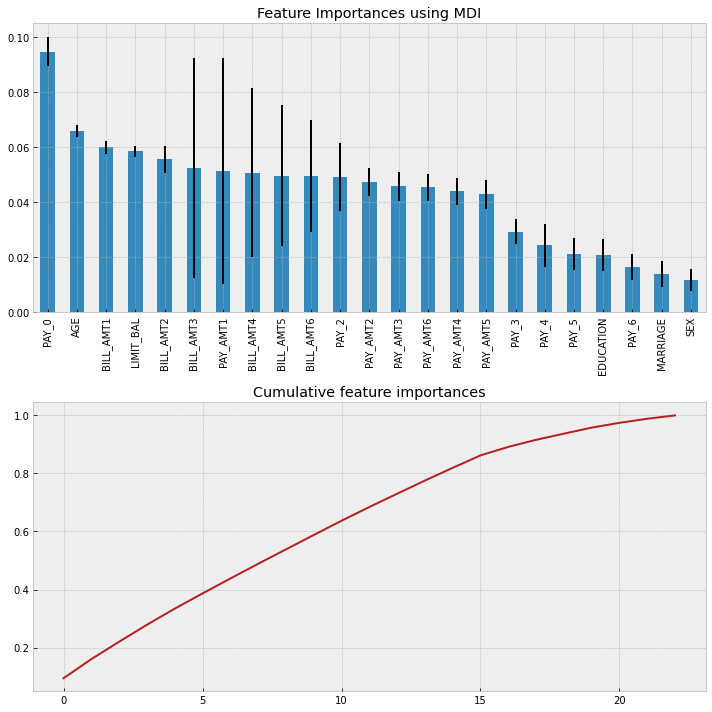

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(10,10), sharex=False)

importances_df['importances'].plot.bar(yerr=importances_std, ax=ax[0], title='Feature Importances using MDI')
ax[1].plot(range(len(importances_df.index)), importances_df['importances'].cumsum(), color='firebrick')
ax[1].set_title('Cumulative feature importances')

plt.tight_layout()
plt.show()

## Feature Permutation

In [8]:
result = permutation_importance(forest, X_train, y_train, n_repeats=10, n_jobs=4)
result_df = pd.DataFrame(data={'mean':result.importances_mean, 'std':result.importances_std}, index=X_train.columns)
result_df.sort_values(by='mean', ascending=False, inplace=True)

In [9]:
for feature, mean, std in zip(result_df.index, result_df['mean'].values, result_df['std'].values):
        print(f"{feature:10s} ----> {mean:.4f} +/- {std:.4f}")

PAY_0      ----> 0.0863 +/- 0.0014
LIMIT_BAL  ----> 0.0652 +/- 0.0011
PAY_AMT1   ----> 0.0575 +/- 0.0008
BILL_AMT1  ----> 0.0560 +/- 0.0010
PAY_AMT3   ----> 0.0541 +/- 0.0006
PAY_AMT4   ----> 0.0468 +/- 0.0009
PAY_AMT2   ----> 0.0413 +/- 0.0008
PAY_AMT6   ----> 0.0407 +/- 0.0010
PAY_AMT5   ----> 0.0396 +/- 0.0009
AGE        ----> 0.0320 +/- 0.0008
PAY_2      ----> 0.0287 +/- 0.0004
BILL_AMT2  ----> 0.0274 +/- 0.0005
BILL_AMT3  ----> 0.0264 +/- 0.0004
BILL_AMT5  ----> 0.0260 +/- 0.0007
BILL_AMT6  ----> 0.0250 +/- 0.0004
BILL_AMT4  ----> 0.0190 +/- 0.0004
PAY_3      ----> 0.0137 +/- 0.0005
PAY_4      ----> 0.0112 +/- 0.0007
PAY_6      ----> 0.0088 +/- 0.0005
PAY_5      ----> 0.0087 +/- 0.0002
MARRIAGE   ----> 0.0078 +/- 0.0003
EDUCATION  ----> 0.0076 +/- 0.0003
SEX        ----> 0.0075 +/- 0.0003


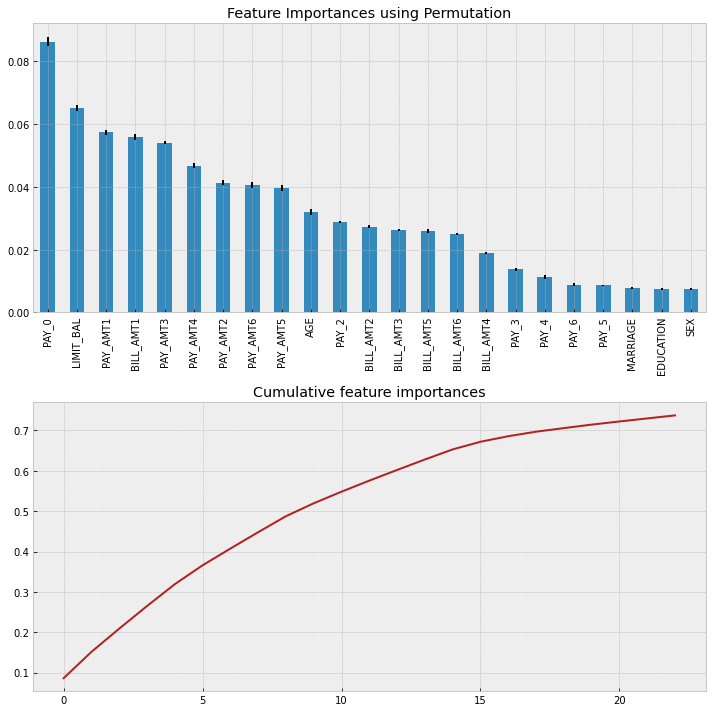

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(10,10), sharex=False)

result_df['mean'].plot.bar(yerr=result_df['std'], ax=ax[0], title='Feature Importances using Permutation')
ax[1].plot(range(len(result_df.index)), result_df['mean'].cumsum(), color='firebrick')
ax[1].set_title('Cumulative feature importances')

plt.tight_layout()
plt.show()